In [1]:
import os
import re
import pandas as pd
from datetime import datetime
from datetime import timedelta

# import tkinter as tk
# from tkinter import filedialog


homedir = r"\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol"


# subject_ids = ['RE602','RE603','RE604']

# tasks = ['pavlovian_spontanous_reaching_march23',
#          ['reaching_go_spout_feb23',
#          'reaching_go_spout_nov22'],
#          'reaching_go_spout_incr_break2_nov22',
#          ['reaching_go_spout_bar_nov22',
#           'reaching_go_spout_bar_mar23']]

subject_ids = ['kms064'] # ['kms058', 'kms060', 'kms061', 'kms062', 'kms063', 'kms064']

tasks = ['reaching_go_spout_incr_break2_nov22']

In [2]:

items = os.listdir(homedir)

folders = [os.path.join(homedir, item) for item in items if os.path.isdir(
    os.path.join(homedir, item))]

print(folders)


['\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\exp01', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\JC301LS', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\debug', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_nobar_nodelay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive_2', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\go_rewarding_aversive', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\reward_calibration', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\train_go_pavlovian', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\pavlovian_2s_delay', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\water_calibration', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\ReachTest', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycontrol\\check_light', '\\\\ettin\\Magill_Lab\\Julien\\Data\\head-fixed\\pycont

In [3]:
# folders = [r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22']
filenames = []
folder_paths = []
for fld in folders:
    files = os.listdir(fld)

    # Filter out the files whose names don't match the regular expression pattern
    regex = re.compile('^(' + '|'.join(subject_ids) + ').+\.txt$')
    matching_files = [file for file in files if regex.match(file)]
    folders_ = [fld for file in files if regex.match(file)]

    if matching_files:
        filenames = filenames + matching_files
        folder_paths = folder_paths + folders_


df = pd.DataFrame({'folder': folder_paths, 'filename': filenames})


def get_date(text):
    match = re.search('\d{4}\-\d{2}\-\d{2}\-\d{6}', text)
    date_str = match.group(0)
    date_obj = datetime.strptime(date_str, '%Y-%m-%d-%H%M%S')
    return date_obj


df['datetime'] = df['filename'].apply(get_date)

df = df.sort_values(by='datetime', ascending=True)
df.reset_index(drop=True, inplace=True)
print(df)


                                               folder  \
0   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
1   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
2   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
3   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
4   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
5   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
6   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
7   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
8   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
9   \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
10  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
11  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
12  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
13  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
14  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
15  \\ettin\Magill_Lab\Julien\Data\head-fixed\pyco...   
16  \\ettin\Magill_Lab\Julien\D

In [4]:
df.loc[:,'filepath'] = [os.path.join(folder, filename) for folder, filename in zip(df['folder'],df['filename'])]

In [5]:
# add columns

df.loc[0,'subject_id'] = 'kms000'
df.loc[0,'task_name'] = 'task'
df.loc[0,'start_date'] = datetime.now()

list_v = []
list_last = []

var_name = 'short_break_ms'

for index, row in df.iterrows():

    with open(os.path.join(df.loc[index,'folder'], df.loc[index,'filename']), 'r') as f:
        all_lines = [line.strip() for line in f.readlines() if line.strip()]

    v_lines = [line for line in all_lines if bool(re.match('^V\s\d+\s', line))]

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sSubject\sID\s\:\s(.+)', all_lines[i])
        i += 1
    subject_id = m.group(1)
    # print(f"{subject_id}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sTask\sname\s\:\s(.+)', all_lines[i])
        i += 1
    task_name = m.group(1)
    # print(f"{task_name}")

    m = None
    i = 0
    while m is None:
        m = re.match('^I\sStart\sdate\s\:\s(.+)', all_lines[i])
        i += 1
    start_date = m.group(1)
    # print(f"{start_date}")

    start_datetime = datetime.strptime(start_date, '%Y/%m/%d %H:%M:%S')

    df.at[index,'subject_id'] = subject_id
    df.at[index, 'task_name'] = task_name
    df.at[index, 'start_date'] = start_datetime

    flag_notyet = True
    for string in v_lines:
        if flag_notyet:
            if not bool(re.match('^V\s0\s', string)):
                flag_notyet = False
                # print('')

        m = re.search('V\s(\d+)\s([\w\d_]+)\s(.+)', string)
        
        if m is not None and m.group(2) == var_name:
            
            list_v.append({'datetime': start_datetime + timedelta(milliseconds= int(m.group(1))), 
                'value': eval(m.group(3))})

    i = -1
    m1 = None
    while m1 is None and i >= -1 * len(all_lines):
        m1 = re.match('^#(\d+):\s.+:(\d+)', all_lines[i])
    
        if m1 is not None:
            m2 = re.match('P\s(\d+)\s.+',all_lines[i-1])
            list_last.append({'datetime': start_datetime + timedelta(milliseconds=int(m2.group(1))),
                'value': float(m1.group(2))/float(m1.group(1)) })

        i -= 1


print(list_v)
print(list_last)

df_v = pd.DataFrame(list_v)
df_last = pd.DataFrame(list_last)


[{'datetime': datetime.datetime(2023, 1, 26, 12, 54, 16), 'value': [1000, 2000]}, {'datetime': datetime.datetime(2023, 1, 27, 12, 20, 55), 'value': [1000, 2000]}, {'datetime': datetime.datetime(2023, 1, 30, 11, 59, 42), 'value': [1500, 2000]}, {'datetime': datetime.datetime(2023, 1, 30, 12, 0, 41, 104000), 'value': [1500, 2500]}, {'datetime': datetime.datetime(2023, 1, 30, 12, 5, 4, 111000), 'value': [1500, 4000]}, {'datetime': datetime.datetime(2023, 1, 30, 12, 5, 53, 316000), 'value': [1800, 2500]}, {'datetime': datetime.datetime(2023, 1, 30, 12, 6, 47, 57000), 'value': [2000, 4000]}, {'datetime': datetime.datetime(2023, 1, 31, 10, 31, 19), 'value': [3000, 6000]}, {'datetime': datetime.datetime(2023, 1, 31, 10, 39, 28, 697000), 'value': [5000, 9000]}, {'datetime': datetime.datetime(2023, 1, 31, 10, 42, 17), 'value': [3000, 6000]}, {'datetime': datetime.datetime(2023, 2, 1, 10, 58, 34), 'value': [3000, 6000]}, {'datetime': datetime.datetime(2023, 2, 1, 11, 1, 9, 86000), 'value': [5000

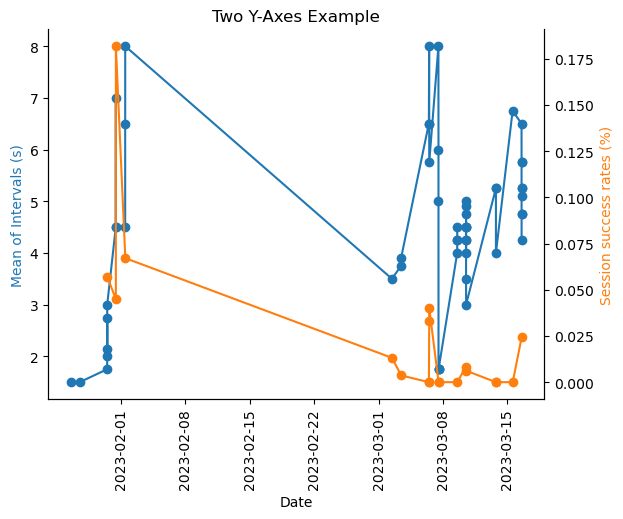

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df_v.datetime, [np.mean(v) /
         1000 for v in df_v.value], 'o-',  color='#1f77b4')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean of Intervals (s)', color='#1f77b4')

ax2.plot(df_last.datetime, df_last.value, 'o-', color='#ff7f0e')
ax2.set_ylabel('Session success rates (%)', color='#ff7f0e')

# Add a title and legend
ax1.set_title('Two Y-Axes Example')
# ax1.legend(['Intervals'], loc='upper left')
# ax2.legend(['Session success rates'], loc='upper right')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

for label in ax1.get_xticklabels():
    label.set_rotation(90)

plt.show()



In [7]:
df = df.loc[[task_name in tasks for task_name in df['task_name']], :]


In [8]:
# follow the delay length

for fp in file_path:
    with open(fp, 'r') as f:
        all_lines = [line.strip() for line in f.readlines() if line.strip()]



NameError: name 'file_path' is not defined